In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

Main Objective

To identify and quantify the specific clinical and pathological factors that are most strongly associated with the recurrence of breast cancer within the observed patient cohort, thereby describing the key risk profile for recurrence.

Problem statement

Breast cancer recurrence remains one of the most critical challenges in oncology, as it significantly impacts patient survival and quality of life. Despite advances in treatment, many patients experience a return of the disease after initial therapy, often due to complex interactions among clinical, pathological, and treatment-related factors. Understanding which patient characteristics such as tumor size, menopausal status, lymph node involvement, or radiation therapy are most strongly associated with recurrence can help guide more targeted interventions and improve long-term outcomes. This study aims to analyze patient data to identify key predictors and patterns associated with breast cancer recurrence using descriptive, bivariate, and multivariate analyses.

Research Questions

Univariate Analysis
-What is the baseline percentage of patients in the study who experienced a breast cancer recurrence?
-How are the patients distributed across different age ranges?
-Which menopause category has the highest number of patients?
-Which is the most common tumor size range?
-Which inv-node category is most frequent?
-What is the most common malignancy level?
-Which breast side (left or right) is more commonly affected?
-Which breast quadrant is most affected?
-How many patients received radiation therapy?

Bivariate Analysis
-Is there a relationship between menopausal status and recurrence? 
-Does tumor size category relate to recurrence rate? 
-Is there an association between breast side (left or right) and recurrence? 
-Does receiving radiation therapy relate to recurrence? 
-Which breast quadrant is most affected by recurrence?

Multivariate Analysis
-Does menopausal status and age together influence recurrence?
-Do tumor size and lymph node involvement together affect recurrence?
-Do radiation therapy and tumor size together influence recurrence?
-Does breast side and radiation therapy together relate to recurrence?
-Do breast quadrant and menopausal status together influence recurrence?

In [3]:
df = pd.read_excel(r"C:/Users/User/Desktop/pydata/pydata_capstone/recurrent_breastcancer.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   target       286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [ ]:
Data Cleaning

Handling missing values

In [43]:
# Check for missing values in each column
df.isnull().sum()

age                   0
menopause             0
tumor-size            0
inv-nodes             0
node-caps             8
deg-malig             0
breast                0
breast-quad           0
irradiat              0
target                0
Recurrence_Numeric    0
dtype: int64

In [44]:
#Filling the missing values
df['breast-quad'].fillna(df['breast-quad'].mode()[0], inplace=True)
df['node-caps'].fillna(df['node-caps'].mode()[0], inplace=True)

df.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_17840\3845544955.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['breast-quad'].fillna(df['breast-quad'].mode()[0], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_17840\3845544955.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

age                   0
menopause             0
tumor-size            0
inv-nodes             0
node-caps             0
deg-malig             0
breast                0
breast-quad           0
irradiat              0
target                0
Recurrence_Numeric    0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 286 non-null    object
 1   menopause           286 non-null    object
 2   tumor-size          286 non-null    object
 3   inv-nodes           286 non-null    object
 4   node-caps           286 non-null    object
 5   deg-malig           286 non-null    int64 
 6   breast              286 non-null    object
 7   breast-quad         286 non-null    object
 8   irradiat            286 non-null    object
 9   target              286 non-null    object
 10  Recurrence_Numeric  286 non-null    int64 
dtypes: int64(2), object(9)
memory usage: 24.7+ KB


Stripping white spaces

In [46]:
# Remove leading and trailing white spaces in all string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

Standardizing text case for consistency

In [47]:
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

Univariate Analysis

In [ ]:
#No. of patients who experience recurrence
# Frequency of recurrence
recurrence_counts = df['target'].value_counts()

# Percentage of recurrence
recurrence_percent = df['target'].value_counts(normalize=True) * 100

recurrence_summary = pd.DataFrame({
    'Frequency': recurrence_counts,
    'Percentage (%)': recurrence_percent.round(2)
})

print(recurrence_summary)

                      Frequency  Percentage (%)
target                                         
no-recurrence-events        201           70.28
recurrence-events            85           29.72


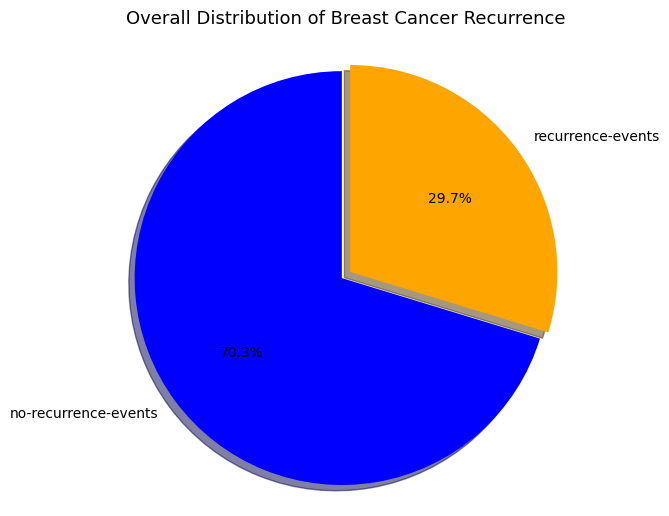

In [48]:
#visualization on pie chat
colors = ['blue', 'orange'] 
explode = (0, 0.05)  

plt.figure(figsize=(6,6))
plt.pie(recurrence_counts,
        labels=recurrence_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        colors=colors,
        explode=explode)

plt.title("Overall Distribution of Breast Cancer Recurrence", fontsize=13, pad=15)

plt.axis('equal')
plt.show()

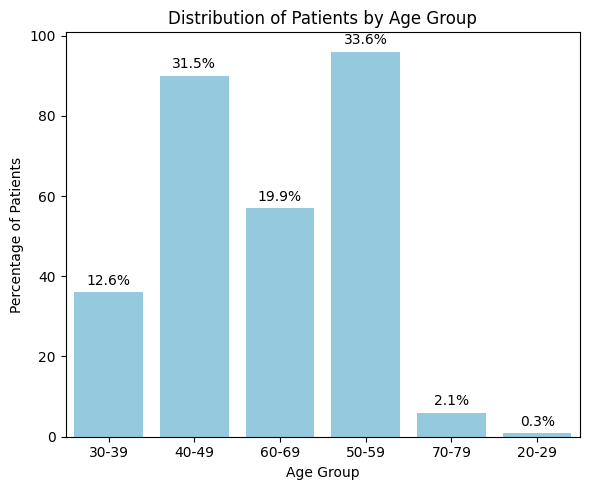

In [ ]:
# How are the patients distributed across different age ranges?

age_order = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

plt.figure(figsize=(6,5))
ax = sns.countplot(x='age', data=df, color='skyblue')

total = len(df)

for container in ax.containers:
    labels = [f'{(v.get_height()/total)*100:.1f}%' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black', padding=3)

plt.title("Distribution of Patients by Age Group", fontsize=12)
plt.xlabel("Age Group")
plt.ylabel("Percentage of Patients")
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_17840\2209104930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='menopause', data=df, palette='Set2')


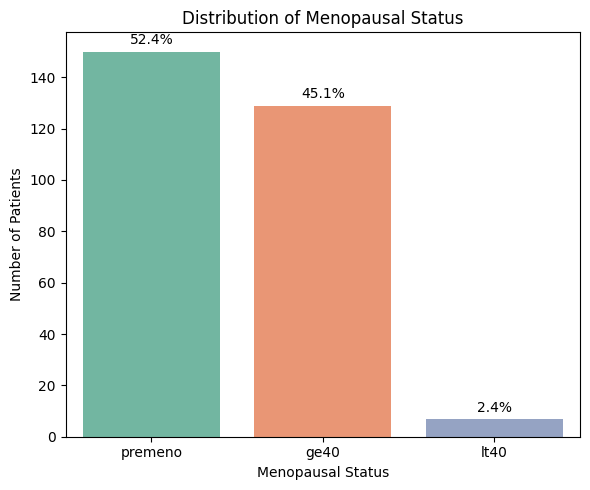

In [55]:
#Which menopause category has the highest number of patients?
plt.figure(figsize=(6,5))
ax = sns.countplot(x='menopause', data=df, palette='Set2')

total = len(df)

for container in ax.containers:
    labels = [f'{(v.get_height()/total)*100:.1f}%' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, padding=3, color='black')

plt.title("Distribution of Menopausal Status", fontsize=12)
plt.xlabel("Menopausal Status")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()

In [10]:
# Most common tumor size and its frequency
most_common = df['tumor-size'].value_counts().head(1)
print(most_common)

tumor-size
30-34    60
Name: count, dtype: int64


In [14]:
#Most frequent inv-nodes category
most_common_invnode = df['inv-nodes'].value_counts().head(1)
print(most_common_invnode)

inv-nodes
0-2    213
Name: count, dtype: int64


In [15]:
#most common malignancy level
most_common_malignancy = df['deg-malig'].value_counts().head(1)
print(most_common_malignancy)

deg-malig
2    130
Name: count, dtype: int64


In [16]:
#most commonly affected breast side
df['breast'].value_counts()

breast
left     152
right    134
Name: count, dtype: int64

In [ ]:
#which breast quadrant is mostly affected

most_common_quad = df['breast-quad'].value_counts().head(1)
print(most_common_quad)

breast-quad
left_low    110
Name: count, dtype: int64


In [18]:
#How many patients received radiation therapy
df['irradiat'].value_counts()

irradiat
no     218
yes     68
Name: count, dtype: int64

Bivariate Analysis

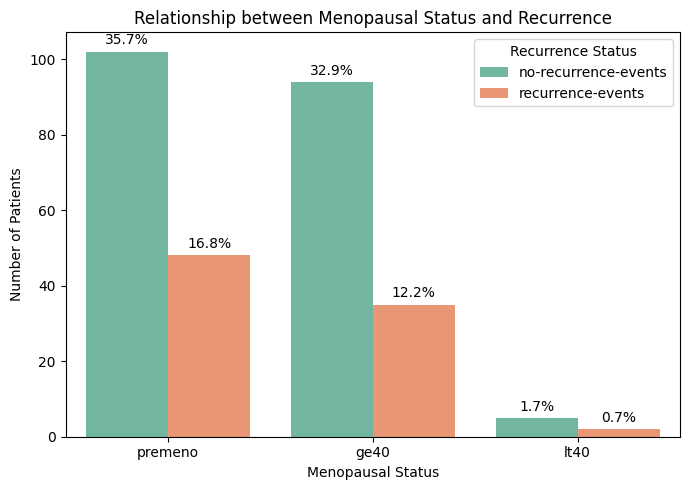

In [ ]:
#Menopausal status vs recurrence

plt.figure(figsize=(7, 5))
ax = sns.countplot(x='menopause', hue='target', data=df, palette='Set2')

total = len(df)

for container in ax.containers:
    labels = [f'{(v.get_height()/total)*100:.1f}%' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, padding=3, color='black')

plt.title('Relationship between Menopausal Status and Recurrence', fontsize=12)
plt.xlabel('Menopausal Status')
plt.ylabel('Number of Patients')
plt.legend(title='Recurrence Status')
plt.tight_layout()
plt.show()


-The risk of recurrence appears present across all menopausal groups, but it seems somewhat higher among premenopausal women, both in frequency and proportion.
-This may suggest that younger, premenopausal patients could be at higher risk of recurrence, possibly due to more aggressive tumor biology or hormonal influences.
-However, to confirm this pattern, further test with chi square would be helpful.

Null hypothesis:There is no significant association between menopausal status and breast cancer recurrence.
Alternative hypothesis:There is a significant association between menopausal status and breast cancer recurrence.

If p ≤ 0.05, we reject the null hypothesis (there is a significant relationship).
If p > 0.05, we fail to reject the null hypothesis (no significant relationship).

In [72]:

contingency_table = pd.crosstab(df['menopause'], df['target'])
print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4f}")

Contingency Table:
target     no-recurrence-events  recurrence-events
menopause                                         
ge40                         94                 35
lt40                          5                  2
premeno                     102                 48

Chi-Square Test Results:
Chi2 Statistic: 0.7915
Degrees of Freedom: 2
P-Value: 0.6732


-A Chi-square test of independence was conducted to determine whether there is an association between menopausal status and breast cancer recurrence. 
-The test revealed no statistically significant relationship between the two variables, χ²= 0.79, p = 0.67. This suggests that menopausal status does not appear to influence recurrence rates in this dataset.

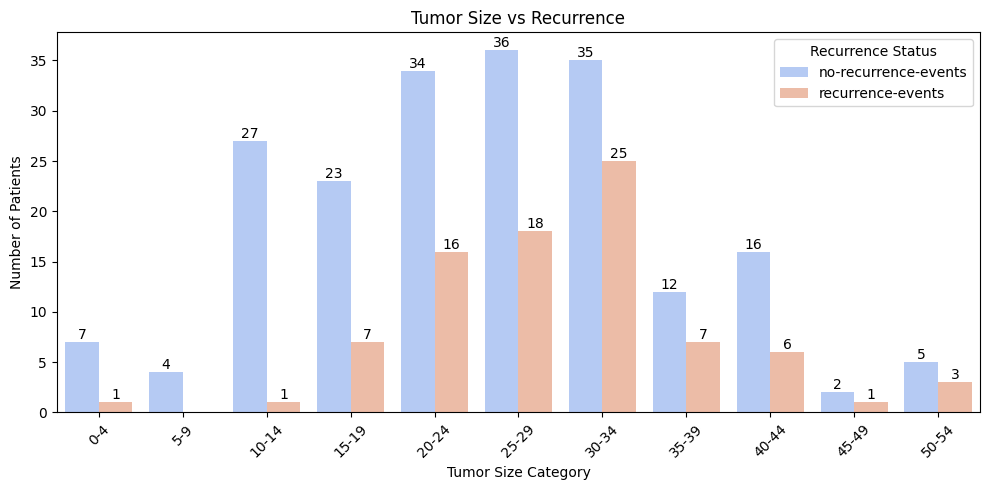

In [ ]:
#Tumor size vs recurrence

order = sorted(df['tumor-size'].dropna().unique(),
               key=lambda x: int(x.split('-')[0]) if '-' in x else int(x))

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='tumor-size', hue='target', data=df, palette='coolwarm', order=order)

for container in ax.containers:
    ax.bar_label(container)

plt.title('Tumor Size vs Recurrence', fontsize=12)
plt.xlabel('Tumor Size Category')
plt.ylabel('Number of Patients')
plt.legend(title='Recurrence Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

-The recurrence rate is lowest for patients in the first few categories.
-The recurrence rate steadily increases as you move to the right along the X-axis (larger tumor sizes). The rate appears to peak in the middle-to-higher categories.
-The data demonstrates that as the underlying measure on the X-axis increases (tumor size increases), the risk of breast cancer recurrence significantly increases.To confirm this a chi square test  was done.

Null hypothesis:There is no significant association between tumor size and recurrence
Alternative hypothesis:There is a significant association between tumor size and recurrence

In [ ]:

contingency_table = pd.crosstab(df['tumor-size'], df['target'])

print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4f}")


Contingency Table:
target      no-recurrence-events  recurrence-events
tumor-size                                         
0-4                            7                  1
10-14                         27                  1
15-19                         23                  7
20-24                         34                 16
25-29                         36                 18
30-34                         35                 25
35-39                         12                  7
40-44                         16                  6
45-49                          2                  1
5-9                            4                  0
50-54                          5                  3

Chi-Square Test Results:
Chi2 Statistic: 17.9157
Degrees of Freedom: 10
P-Value: 0.0564


-The Chi-square test for association between tumor size and recurrence yielded a χ² statistic of 17.9157 a p-value of 0.0564. -Since the p-value is slightly above the 0.05 significance threshold, we fail to reject the null hypothesis. This suggests that there is no statistically significant association between tumor size and recurrence. However, the result is near the threshold, indicating a possible weak trend where patients with larger tumors may have a higher recurrence rate.

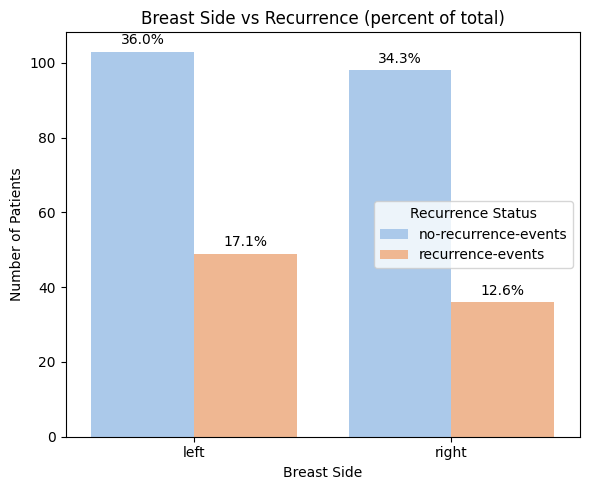

In [ ]:
#Breast side vs recurrence
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='breast', hue='target', data=df, palette='pastel')

subset = df.dropna(subset=['breast','target'])
total = len(subset)

for container in ax.containers:
    labels = [f'{(v.get_height()/total)*100:.1f}%' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, padding=3, color='black')

plt.title('Breast Side vs Recurrence (percent of total)', fontsize=12)
plt.xlabel('Breast Side')
plt.ylabel('Number of Patients')
plt.legend(title='Recurrence Status')
plt.tight_layout()
plt.show()


-The bar chart shows the distribution of recurrence events by breast side.
-A slightly higher proportion of patients had cancer in the left breast compared to the right. 
-Recurrence events were somewhat more frequent in the left breast (17.1%) than in the right (12.6%), though the difference appears small. This suggests that breast side may not have a strong influence on recurrence, a finding that would need to be statistically confirmed using a Chi-square test.

Null hypothesis:There is no significant association between breast side and recurrence
Alternative hypothesis:There is significant association between breast side and recurrence

In [ ]:

contingency_table = pd.crosstab(df['breast'], df['target'])

print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4f}")

Contingency Table:
target  no-recurrence-events  recurrence-events
breast                                         
left                     103                 49
right                     98                 36

Chi-Square Test Results:
Chi2 Statistic: 0.7433
Degrees of Freedom: 1
P-Value: 0.3886


-The Chi-square test was conducted to examine the relationship between breast side and cancer recurrence. 
-The results showed no statistically significant association between the two variables. Although recurrence appeared slightly higher in the left breast (49 cases) compared to the right (36 cases), the difference was not significant. This suggests that breast side does not have a meaningful influence on recurrence rates in this dataset.

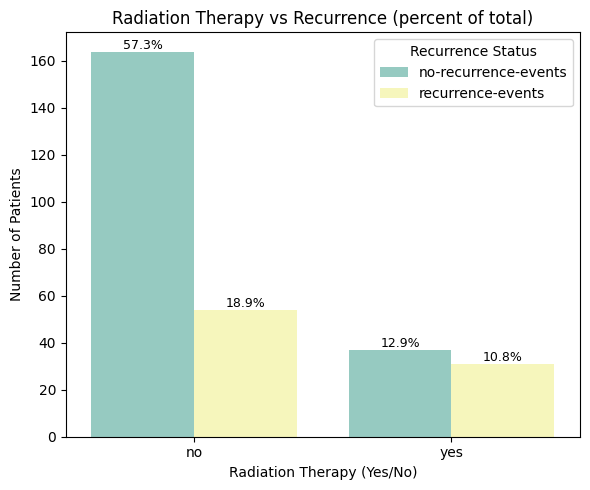

In [61]:
#Radiation therapy vs recurrence
plt.figure(figsize=(6, 5))

ax = sns.countplot(x='irradiat', hue='target', data=df, palette='Set3')

total = len(df)

for container in ax.containers:
    counts = container.datavalues
    percentages = [f'{(count/total)*100:.1f}%' for count in counts]
    ax.bar_label(container, labels=percentages, label_type='edge', fontsize=9)

plt.title('Radiation Therapy vs Recurrence (percent of total)', fontsize=12)
plt.xlabel('Radiation Therapy (Yes/No)')
plt.ylabel('Number of Patients')
plt.legend(title='Recurrence Status')
plt.tight_layout()
plt.show()

-The bar chart shows the distribution of recurrence events by radiation therapy.
-A slightly higher proportion of patients who had not undergone radiation therapy had cancer recurrence.
-Recurrence events were somewhat more frequent in those who had not undergone radiation therapy. This suggests that radiation therapy may have an influence on recurrence, a finding that would need to be statistically confirmed using a Chi-square test.

Null hypothesis:There is no significant relationship between radiation therapy and recurrence
Alternative hypothesis:There is a significant relationship between radiation therapy and recurrence

In [ ]:

contingency_table = pd.crosstab(df['irradiat'], df['target'])

print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4f}")

Contingency Table:
target    no-recurrence-events  recurrence-events
irradiat                                         
no                         164                 54
yes                         37                 31

Chi-Square Test Results:
Chi2 Statistic: 9.7806
Degrees of Freedom: 1
P-Value: 0.0018


Most of the patients with recurrence events had not undergone radiation therapy.The chi square test revealeda significant association between the two variables indicating that radiation therapy has a significant impact on recurrence in this dataset.

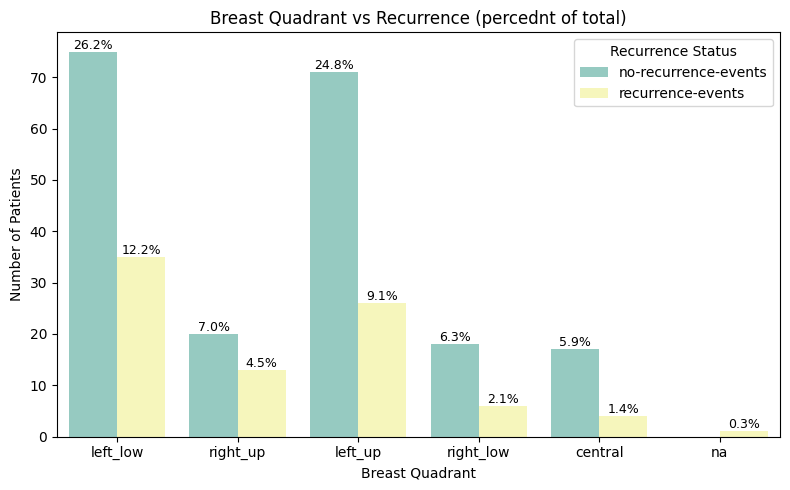

In [62]:
#Breast quadrant vs recurrence
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='breast-quad', hue='target', data=df, palette='Set3')

total= len(df)
for container in ax.containers:
    counts= container.datavalues
    percentages= [f'{(count/total)*100:.1f}%' for count in counts]
    ax.bar_label(container, labels = percentages, label_type='edge', fontsize =9)
plt.title('Breast Quadrant vs Recurrence (percednt of total)', fontsize=12)
plt.xlabel('Breast Quadrant')
plt.ylabel('Number of Patients')
plt.legend(title='Recurrence Status')
plt.tight_layout()
plt.show()

-The visualization suggests that both tumor occurrence and recurrence is more frequent in the left breast, particularly the left lower quadrants.To investigate where there exists an association between the variables a chi square test was done.

Null hypothesis:The is no significant association between breast quadrant and recurrence
Alternative hypothesis:There is a significant association between breast quadrant and recurrence

In [ ]:

contingency_table = pd.crosstab(df['breast-quad'], df['target'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)


Chi-square Statistic: 5.871094841998962
Degrees of Freedom: 5
P-value: 0.3189647481357057


-The Chi-Square test showed no statistically significant association between breast-quad and recurrence status (χ² = 5.871, p = 0.319).
-This means that differences in recurrence across categories of breast quadrant could be due to chance rather than a real underlying relationship.

Multivariate Analysis